## PREPARING REVIEWS

#### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### Read CSV

In [2]:
df = pd.read_csv("5reviews.csv")

#### First Look on Data

In [3]:
df.head(5)

,review,score
0,"The only problem, I actually counted the amoun...",4.0
1,Me and my wife and my kids love them,5.0
2,Definitely one of the best candies you can buy...,5.0
3,"The price is great, but there are mostly grape...",3.0
4,"Box and packaging in great shape, kids love them.",5.0


In [4]:
df.shape

(5248, 2)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,5248.0,3.959985,1.529308,1.0,3.0,5.0,5.0,5.0


### Data Preprocessing

#### 1.Missing Observation Analysis

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

review    22
score      0
dtype: int64

#### 2.Visualization Missing Values

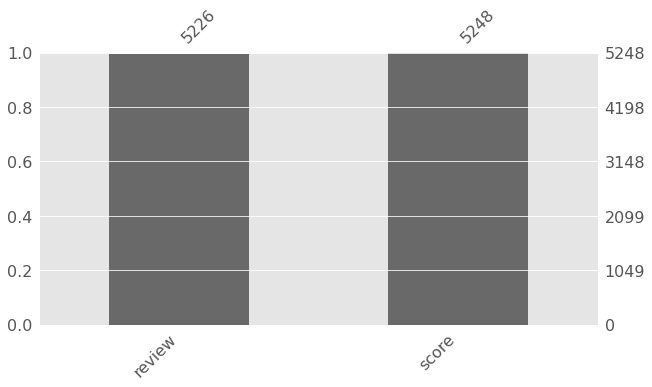

In [8]:
msno.bar(df, figsize=(10,5));

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

review    0
score     0
dtype: int64

In [11]:
df.shape

(5226, 2)

#### 3.Duplicated Value Analysis

In [14]:
df["review"].duplicated().sum()

506

In [15]:
df = df.drop_duplicates(subset=['review'])

In [17]:
df.shape

(4720, 2)

### Text Processing

#### Import Dependencies

In [19]:
import re
import nltk
from nltk.corpus import stopwords

from textblob import TextBlob
from textblob import Word

#### 1.Extract Reviews

In [25]:
reviews = df["review"].copy()
scores = df["score"].copy()

#### 2.Vectorize Sentences

In [28]:
r = pd.Series(reviews)

In [29]:
reviews = pd.DataFrame(r)

In [30]:
reviews.head()

,review
0,"The only problem, I actually counted the amoun..."
1,Me and my wife and my kids love them
2,Definitely one of the best candies you can buy...
3,"The price is great, but there are mostly grape..."
4,"Box and packaging in great shape, kids love them."


#### 3.Delete HTML Tags

In [32]:
reviews["review"][3969]

'The most traumatic experience ever, buy it at your own risk. The machine caught fire the first time I used it, and there were other family members who were in the house as well, jeopardising not just my life but the lives of my other family members. We had to extinguish the fire using a fire extinguisher.When I tried to return it, it was a whole other traumatic experience. Shipping it back itself costs >USD290, and after several back and forths with the terrible Amazon customer service team, they promised that the shipping fee will be refunded back to me as long as I produce an invoice.So after it was shipped, I sent the invoice to them and they then say that the shipping fee will be refunded as AMAZON PROMOTIONAL CREDIT.DO NOT - I REPEAT - DO NOT BUY THIS MACHINE. I spent so many hours trying to process the refund and going back and forth, wasting my time and my money.'

In [33]:
re.sub('<.*?>', '', reviews["review"][3969])

'The most traumatic experience ever, buy it at your own risk. The machine caught fire the first time I used it, and there were other family members who were in the house as well, jeopardising not just my life but the lives of my other family members. We had to extinguish the fire using a fire extinguisher.When I tried to return it, it was a whole other traumatic experience. Shipping it back itself costs >USD290, and after several back and forths with the terrible Amazon customer service team, they promised that the shipping fee will be refunded back to me as long as I produce an invoice.So after it was shipped, I sent the invoice to them and they then say that the shipping fee will be refunded as AMAZON PROMOTIONAL CREDIT.DO NOT - I REPEAT - DO NOT BUY THIS MACHINE. I spent so many hours trying to process the refund and going back and forth, wasting my time and my money.'

In [34]:
# remove function
def removeTags(string):
    r = re.sub('<.*?>','', string)
    return r

In [35]:
removeTags(reviews["review"][3969])

'The most traumatic experience ever, buy it at your own risk. The machine caught fire the first time I used it, and there were other family members who were in the house as well, jeopardising not just my life but the lives of my other family members. We had to extinguish the fire using a fire extinguisher.When I tried to return it, it was a whole other traumatic experience. Shipping it back itself costs >USD290, and after several back and forths with the terrible Amazon customer service team, they promised that the shipping fee will be refunded back to me as long as I produce an invoice.So after it was shipped, I sent the invoice to them and they then say that the shipping fee will be refunded as AMAZON PROMOTIONAL CREDIT.DO NOT - I REPEAT - DO NOT BUY THIS MACHINE. I spent so many hours trying to process the refund and going back and forth, wasting my time and my money.'

In [36]:
withoutTags = reviews["review"].apply(lambda x: removeTags(x))

In [37]:
reviews = pd.DataFrame(withoutTags)

#### 4.Delete Numerical Values

In [39]:
reviews["review"][2]

"Definitely one of the best candies you can buy for selling at school. First of all they don't melt while in a backpack for hours. Second of all you can make an 80% profit margin by selling 2 airheads for $1. And last of all I sold all 60 airheads in just 4 days!"

In [44]:
removeNumerics = reviews["review"].str.replace("\d","")

In [47]:
removeNumerics[2]

"Definitely one of the best candies you can buy for selling at school. First of all they don't melt while in a backpack for hours. Second of all you can make an % profit margin by selling  airheads for $. And last of all I sold all  airheads in just  days!"

In [48]:
reviews = pd.DataFrame(removeNumerics)

#### 5.Upper/Lower Cases

In [50]:
reviews["review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

0       the only problem, i actually counted the amoun...
1                    me and my wife and my kids love them
2       definitely one of the best candies you can buy...
3       the price is great, but there are mostly grape...
4       box and packaging in great shape, kids love them.
                              ...                        
5243                       perfect snack in the afternoon
5244    poor & misleading variety for a pack. was expe...
5245     the flavours are fantastic, coconut is the best.
5246    requires much chewing, but an adequate meal su...
5247    i tried all the flavors and they are all awful...
Name: review, Length: 4720, dtype: object

In [51]:
toLower = reviews["review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [52]:
reviews = pd.DataFrame(toLower)
reviews.head()

,review
0,"the only problem, i actually counted the amoun..."
1,me and my wife and my kids love them
2,definitely one of the best candies you can buy...
3,"the price is great, but there are mostly grape..."
4,"box and packaging in great shape, kids love them."


#### 6.Stopwords

In [53]:
sw = stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [54]:
reviews["review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

0              problem, actually counted amount box. box,
1                                          wife kids love
2       definitely one best candies buy selling school...
3           price great, mostly grape orange flavors box.
4              box packaging great shape, kids love them.
                              ...                        
5243                              perfect snack afternoon
5244    poor & misleading variety pack. expecting blue...
5245                    flavours fantastic, coconut best.
5246    requires much chewing, adequate meal substitut...
5247       tried flavors awful! super gross texture well.
Name: review, Length: 4720, dtype: object

In [55]:
withoutSW = reviews["review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [56]:
reviews = pd.DataFrame(withoutSW)
reviews.head()

,review
0,"problem, actually counted amount box. box,"
1,wife kids love
2,definitely one best candies buy selling school...
3,"price great, mostly grape orange flavors box."
4,"box packaging great shape, kids love them."


#### 7.Delete Punctuation Marks

In [57]:
reviews["review"][2]

'definitely one best candies buy selling school. first melt backpack hours. second make % profit margin selling airheads $. last sold airheads days!'

In [58]:
removeMarks = reviews["review"].str.replace("[^\w\s]","")

In [60]:
removeMarks[2]

'definitely one best candies buy selling school first melt backpack hours second make  profit margin selling airheads  last sold airheads days'

In [61]:
reviews = pd.DataFrame(removeMarks)

### Export Data

In [62]:
reviews.to_csv(r'7reviewsPrepared.csv', index=False, header=True)

In [63]:
scores.to_csv(r'7scores.csv', index=False, header=True)